In [2]:
import mysql.connector as connection
import pandas as pd
import matplotlib.pyplot as plt

mydb = connection.connect(
    host="localhost",
    user="root",
    password="divya",
    database="Employee_Management_System",
    use_pure=True
)
print("Connected to MySQL!")

C:\Users\nimba\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\nimba\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


Connected to MySQL!


C:\Users\nimba\AppData\Local\Temp\ipykernel_23864\1100316072.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_dept_emp = pd.read_sql(query1, mydb)


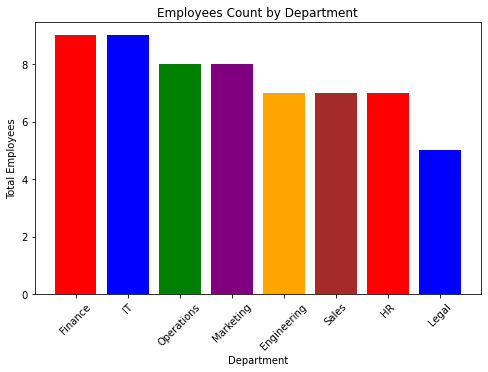

In [13]:
query1 = """
SELECT jd.jobdept, COUNT(e.emp_ID) AS total_employees
FROM Employee e
JOIN JobDepartment jd ON e.Job_ID = jd.Job_ID
GROUP BY jd.jobdept
ORDER BY total_employees DESC;
"""
df_dept_emp = pd.read_sql(query1, mydb)

plt.figure(figsize=(8,5))
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']
plt.bar(df_dept_emp['jobdept'], df_dept_emp['total_employees'], color=colors[:len(df_dept_emp)])
plt.xlabel("Department")
plt.ylabel("Total Employees")
plt.title("Employees Count by Department")
plt.xticks(rotation=45)
plt.show()


C:\Users\nimba\AppData\Local\Temp\ipykernel_23864\2583687617.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_leaves = pd.read_sql(query2, mydb)


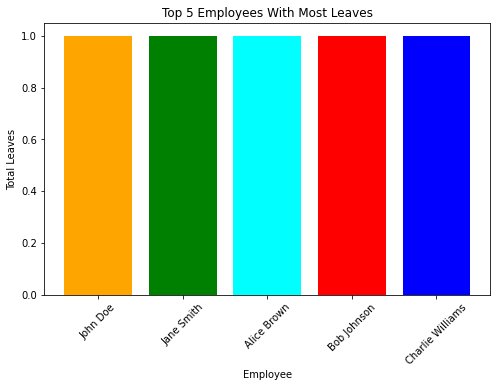

In [14]:
query2 = """
SELECT CONCAT(e.firstname, ' ', e.lastname) AS employee,
       COUNT(l.leave_ID) AS total_leaves
FROM Leaves l
JOIN Employee e ON l.emp_ID = e.emp_ID
GROUP BY e.emp_ID
ORDER BY total_leaves DESC
LIMIT 5;
"""
df_leaves = pd.read_sql(query2, mydb)

plt.figure(figsize=(8,5))
colors = ['orange', 'green', 'cyan', 'red', 'blue']
plt.bar(df_leaves['employee'], df_leaves['total_leaves'], color=colors)
plt.xlabel("Employee")
plt.ylabel("Total Leaves")
plt.title("Top 5 Employees With Most Leaves")
plt.xticks(rotation=45)
plt.show()


C:\Users\nimba\AppData\Local\Temp\ipykernel_23864\4263877942.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_qual = pd.read_sql(query3, mydb)


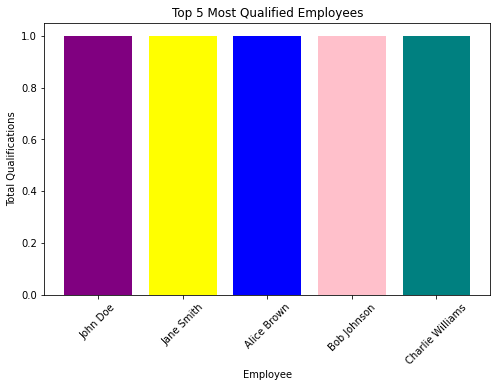

In [15]:
query3 = """
SELECT CONCAT(e.firstname, ' ', e.lastname) AS employee,
       COUNT(q.QualID) AS total_qualifications
FROM Qualification q
JOIN Employee e ON q.Emp_ID = e.emp_ID
GROUP BY e.emp_ID
ORDER BY total_qualifications DESC
LIMIT 5;
"""
df_qual = pd.read_sql(query3, mydb)

plt.figure(figsize=(8,5))
colors = ['purple', 'yellow', 'blue', 'pink', 'teal']
plt.bar(df_qual['employee'], df_qual['total_qualifications'], color=colors)
plt.xlabel("Employee")
plt.ylabel("Total Qualifications")
plt.title("Top 5 Most Qualified Employees")
plt.xticks(rotation=45)
plt.show()


C:\Users\nimba\AppData\Local\Temp\ipykernel_23864\3856629545.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_role_salary = pd.read_sql(query4, mydb)


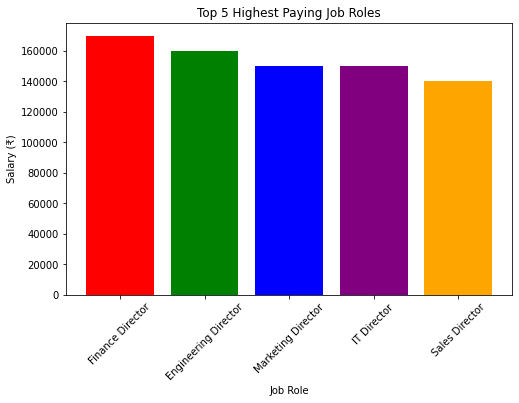

In [16]:
query4 = """
SELECT jd.name AS job_role, jd.jobdept, sb.amount AS salary
FROM JobDepartment jd
JOIN SalaryBonus sb ON jd.Job_ID = sb.Job_ID
ORDER BY sb.amount DESC
LIMIT 5;
"""
df_role_salary = pd.read_sql(query4, mydb)

plt.figure(figsize=(8,5))
colors = ['red', 'green', 'blue', 'purple', 'orange']
plt.bar(df_role_salary['job_role'], df_role_salary['salary'], color=colors)
plt.xlabel("Job Role")
plt.ylabel("Salary (₹)")
plt.title("Top 5 Highest Paying Job Roles")
plt.xticks(rotation=45)
plt.show()


C:\Users\nimba\AppData\Local\Temp\ipykernel_23864\3220619557.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_salary_dept = pd.read_sql(query5, mydb)


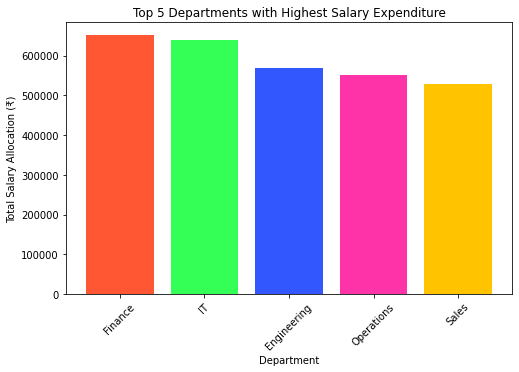

In [17]:
query5 = """
SELECT jd.jobdept, SUM(sb.amount) AS total_salary
FROM SalaryBonus sb
JOIN JobDepartment jd ON sb.Job_ID = jd.Job_ID
GROUP BY jd.jobdept
ORDER BY total_salary DESC
LIMIT 5;
"""
df_salary_dept = pd.read_sql(query5, mydb)

plt.figure(figsize=(8,5))
colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A8', '#FFC300']  # Beautiful unique colors
plt.bar(df_salary_dept['jobdept'], df_salary_dept['total_salary'], color=colors)
plt.xlabel("Department")
plt.ylabel("Total Salary Allocation (₹)")
plt.title("Top 5 Departments with Highest Salary Expenditure")
plt.xticks(rotation=45)
plt.show()


C:\Users\nimba\AppData\Local\Temp\ipykernel_21352\1923832791.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_total_emp = pd.read_sql(query1, mydb)


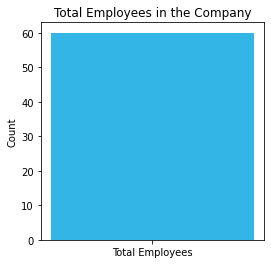

In [3]:
query1 = """
SELECT COUNT(DISTINCT emp_ID) AS total_employees
FROM Employee;
"""
df_total_emp = pd.read_sql(query1, mydb)

plt.figure(figsize=(4,4))
plt.bar(['Total Employees'], df_total_emp['total_employees'], color='#33B5E5')
plt.title("Total Employees in the Company")
plt.ylabel("Count")
plt.show()


C:\Users\nimba\AppData\Local\Temp\ipykernel_21352\220807193.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_avg_salary = pd.read_sql(query2, mydb)


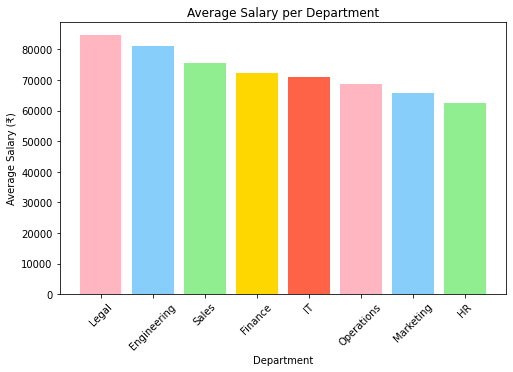

In [4]:
query2 = """
SELECT jd.jobdept, AVG(sb.amount) AS avg_salary
FROM SalaryBonus sb
JOIN JobDepartment jd ON sb.Job_ID = jd.Job_ID
GROUP BY jd.jobdept
ORDER BY avg_salary DESC;
"""
df_avg_salary = pd.read_sql(query2, mydb)

plt.figure(figsize=(8,5))
colors = ['#FFB6C1', '#87CEFA', '#90EE90', '#FFD700', '#FF6347']
plt.bar(df_avg_salary['jobdept'], df_avg_salary['avg_salary'], color=colors)
plt.title("Average Salary per Department")
plt.xlabel("Department")
plt.ylabel("Average Salary (₹)")
plt.xticks(rotation=45)
plt.show()


C:\Users\nimba\AppData\Local\Temp\ipykernel_21352\2488406726.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_paid = pd.read_sql(query3, mydb)


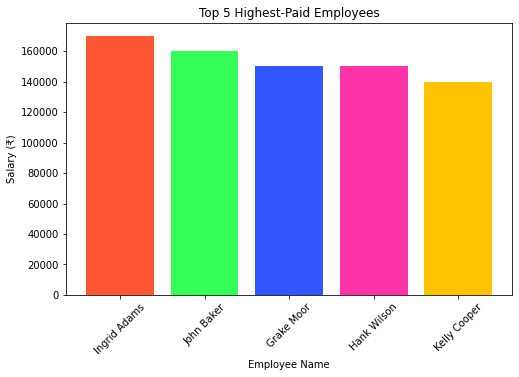

In [5]:
query3 = """
SELECT e.firstname, e.lastname, jd.jobdept, sb.amount AS salary
FROM Employee e
JOIN JobDepartment jd ON e.Job_ID = jd.Job_ID
JOIN SalaryBonus sb ON jd.Job_ID = sb.Job_ID
ORDER BY sb.amount DESC
LIMIT 5;
"""
df_top_paid = pd.read_sql(query3, mydb)

plt.figure(figsize=(8,5))
plt.bar(df_top_paid['firstname'] + " " + df_top_paid['lastname'], df_top_paid['salary'], color=['#FF5733','#33FF57','#3357FF','#FF33A8','#FFC300'])
plt.title("Top 5 Highest-Paid Employees")
plt.xlabel("Employee Name")
plt.ylabel("Salary (₹)")
plt.xticks(rotation=45)
plt.show()


C:\Users\nimba\AppData\Local\Temp\ipykernel_21352\1589147930.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_most_leaves = pd.read_sql(query4, mydb)


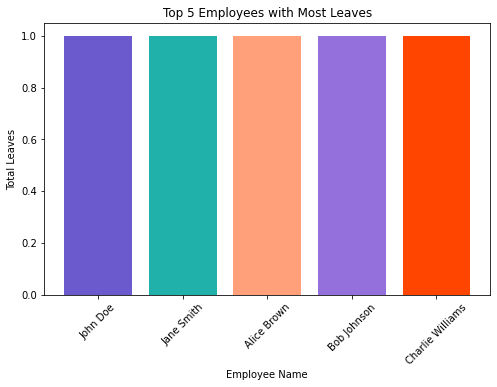

In [6]:
query4 = """
SELECT e.firstname, e.lastname, COUNT(l.leave_ID) AS total_leaves
FROM Leaves l
JOIN Employee e ON l.emp_ID = e.emp_ID
GROUP BY e.emp_ID
ORDER BY total_leaves DESC
LIMIT 5;
"""
df_most_leaves = pd.read_sql(query4, mydb)

plt.figure(figsize=(8,5))
plt.bar(df_most_leaves['firstname'] + " " + df_most_leaves['lastname'], df_most_leaves['total_leaves'], color=['#6A5ACD','#20B2AA','#FFA07A','#9370DB','#FF4500'])
plt.title("Top 5 Employees with Most Leaves")
plt.xlabel("Employee Name")
plt.ylabel("Total Leaves")
plt.xticks(rotation=45)
plt.show()


C:\Users\nimba\AppData\Local\Temp\ipykernel_21352\3931415889.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_salary_dept = pd.read_sql(query5, mydb)


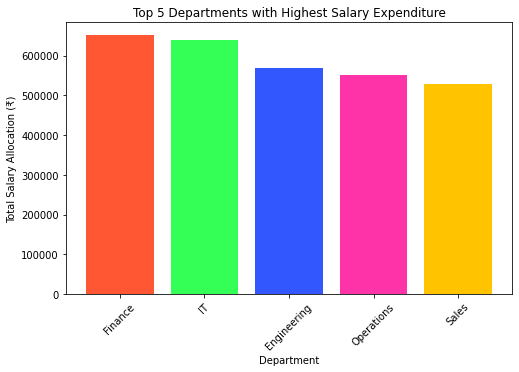

In [7]:
query5 = """
SELECT jd.jobdept, SUM(sb.amount) AS total_salary
FROM SalaryBonus sb
JOIN JobDepartment jd ON sb.Job_ID = jd.Job_ID
GROUP BY jd.jobdept
ORDER BY total_salary DESC
LIMIT 5;
"""
df_salary_dept = pd.read_sql(query5, mydb)

plt.figure(figsize=(8,5))
colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A8', '#FFC300']
plt.bar(df_salary_dept['jobdept'], df_salary_dept['total_salary'], color=colors)
plt.xlabel("Department")
plt.ylabel("Total Salary Allocation (₹)")
plt.title("Top 5 Departments with Highest Salary Expenditure")
plt.xticks(rotation=45)
plt.show()


C:\Users\nimba\AppData\Local\Temp\ipykernel_21352\1206061668.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_avg_salary = pd.read_sql(query2, mydb)


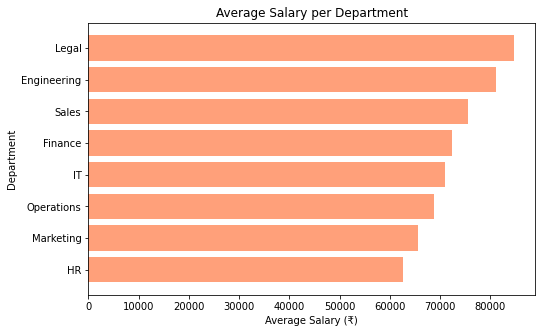

In [8]:
query2 = """
SELECT jd.jobdept, AVG(sb.amount) AS avg_salary
FROM SalaryBonus sb
JOIN JobDepartment jd ON sb.Job_ID = jd.Job_ID
GROUP BY jd.jobdept
ORDER BY avg_salary DESC;
"""
df_avg_salary = pd.read_sql(query2, mydb)

plt.figure(figsize=(8,5))
plt.barh(df_avg_salary['jobdept'], df_avg_salary['avg_salary'], color='#FFA07A')
plt.xlabel("Average Salary (₹)")
plt.ylabel("Department")
plt.title("Average Salary per Department")
plt.gca().invert_yaxis()
plt.show()


C:\Users\nimba\AppData\Local\Temp\ipykernel_21352\883614158.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_paid = pd.read_sql(query3, mydb)


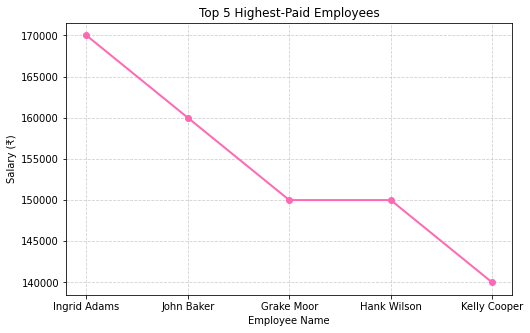

In [9]:
query3 = """
SELECT e.firstname, e.lastname, jd.jobdept, sb.amount AS salary
FROM Employee e
JOIN JobDepartment jd ON e.Job_ID = jd.Job_ID
JOIN SalaryBonus sb ON jd.Job_ID = sb.Job_ID
ORDER BY sb.amount DESC
LIMIT 5;
"""
df_top_paid = pd.read_sql(query3, mydb)

plt.figure(figsize=(8,5))
plt.plot(df_top_paid['firstname'] + " " + df_top_paid['lastname'], df_top_paid['salary'], marker='o', color='#FF69B4', linewidth=2)
plt.title("Top 5 Highest-Paid Employees")
plt.xlabel("Employee Name")
plt.ylabel("Salary (₹)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


C:\Users\nimba\AppData\Local\Temp\ipykernel_21352\3049573578.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_most_leaves = pd.read_sql(query4, mydb)


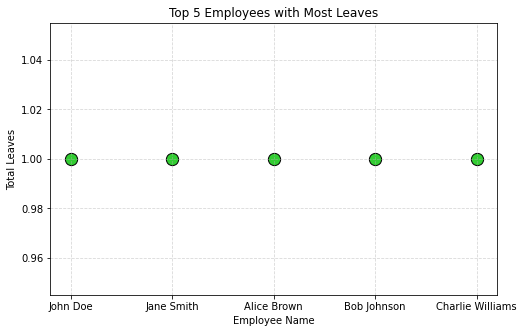

In [10]:
query4 = """
SELECT e.firstname, e.lastname, COUNT(l.leave_ID) AS total_leaves
FROM Leaves l
JOIN Employee e ON l.emp_ID = e.emp_ID
GROUP BY e.emp_ID
ORDER BY total_leaves DESC
LIMIT 5;
"""
df_most_leaves = pd.read_sql(query4, mydb)

plt.figure(figsize=(8,5))
plt.scatter(df_most_leaves['firstname'] + " " + df_most_leaves['lastname'],
            df_most_leaves['total_leaves'], s=150, color='#32CD32', edgecolor='black')
plt.title("Top 5 Employees with Most Leaves")
plt.xlabel("Employee Name")
plt.ylabel("Total Leaves")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


C:\Users\nimba\AppData\Local\Temp\ipykernel_21352\1923832791.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_total_emp = pd.read_sql(query1, mydb)


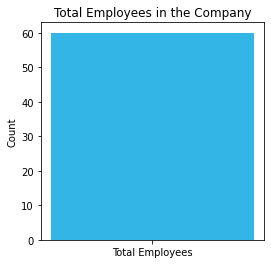

In [11]:
query1 = """
SELECT COUNT(DISTINCT emp_ID) AS total_employees
FROM Employee;
"""
df_total_emp = pd.read_sql(query1, mydb)

plt.figure(figsize=(4,4))
plt.bar(['Total Employees'], df_total_emp['total_employees'], color='#33B5E5')
plt.title("Total Employees in the Company")
plt.ylabel("Count")
plt.show()


C:\Users\nimba\AppData\Local\Temp\ipykernel_21352\1872426441.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_salary_dept = pd.read_sql(query5, mydb)


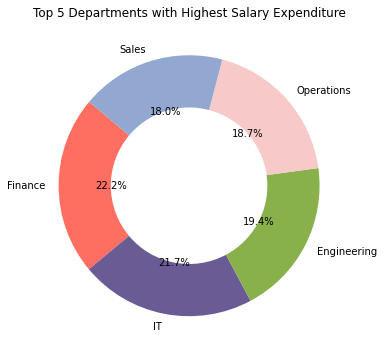

In [13]:
query5 = """
SELECT jd.jobdept, SUM(sb.amount) AS total_salary
FROM SalaryBonus sb
JOIN JobDepartment jd ON sb.Job_ID = jd.Job_ID
GROUP BY jd.jobdept
ORDER BY total_salary DESC
LIMIT 5;
"""
df_salary_dept = pd.read_sql(query5, mydb)

plt.figure(figsize=(6,6))
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1']
plt.pie(df_salary_dept['total_salary'], labels=df_salary_dept['jobdept'],
        autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'width':0.4})
plt.title("Top 5 Departments with Highest Salary Expenditure")
plt.show()


C:\Users\nimba\AppData\Local\Temp\ipykernel_21352\3931415889.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_salary_dept = pd.read_sql(query5, mydb)


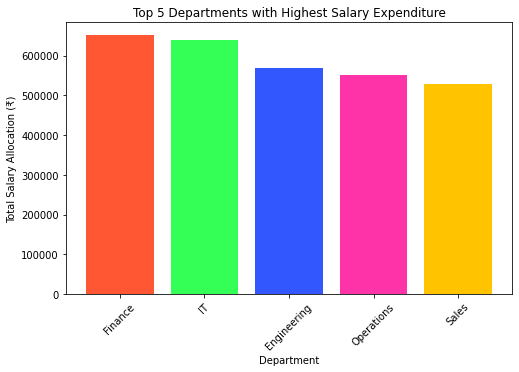

In [14]:
query5 = """
SELECT jd.jobdept, SUM(sb.amount) AS total_salary
FROM SalaryBonus sb
JOIN JobDepartment jd ON sb.Job_ID = jd.Job_ID
GROUP BY jd.jobdept
ORDER BY total_salary DESC
LIMIT 5;
"""
df_salary_dept = pd.read_sql(query5, mydb)

plt.figure(figsize=(8,5))
colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A8', '#FFC300']
plt.bar(df_salary_dept['jobdept'], df_salary_dept['total_salary'], color=colors)
plt.xlabel("Department")
plt.ylabel("Total Salary Allocation (₹)")
plt.title("Top 5 Departments with Highest Salary Expenditure")
plt.xticks(rotation=45)
plt.show()


In [18]:
query7 = """
SELECT jd.jobdept, SUM(sb.bonus) AS total_bonus
FROM SalaryBonus sb
JOIN JobDepartment jd ON sb.Job_ID = jd.Job_ID
GROUP BY jd.jobdept
ORDER BY total_bonus DESC
LIMIT 1;
"""
df_top_bonus = pd.read_sql(query7, mydb)
print(df_top_bonus)


   jobdept  total_bonus
0  Finance      96000.0


C:\Users\nimba\AppData\Local\Temp\ipykernel_21352\1550810329.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_bonus = pd.read_sql(query7, mydb)


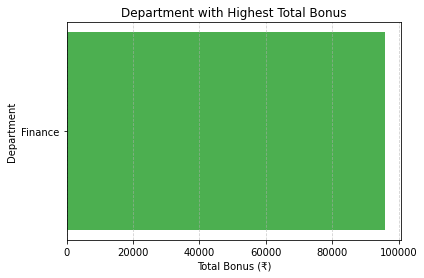

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.barh(df_top_bonus['jobdept'], df_top_bonus['total_bonus'], color='#4CAF50')
plt.xlabel("Total Bonus (₹)")
plt.ylabel("Department")
plt.title("Department with Highest Total Bonus")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


C:\Users\nimba\AppData\Local\Temp\ipykernel_21352\1305747630.py:6: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\nimba\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


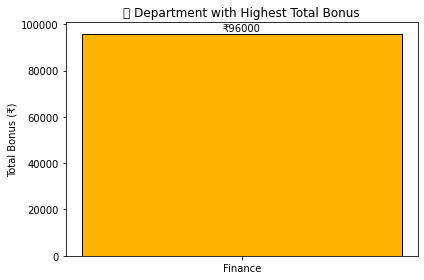

In [20]:
plt.figure(figsize=(6,4))
bars = plt.bar(df_top_bonus['jobdept'], df_top_bonus['total_bonus'], color='#FFB300', edgecolor='black')
plt.bar_label(bars, fmt='₹%.0f', label_type='edge', fontsize=10)
plt.title("🏆 Department with Highest Total Bonus")
plt.ylabel("Total Bonus (₹)")
plt.tight_layout()
plt.show()
